Basic Statistics:
Total messages: 29460
Date range: 2021-12-10 16:59:00 to 2025-03-24 21:32:00

Message Count by Sender:
Sender
Rinku Raphy    18202
💝Jo💝           11258
Name: count, dtype: int64


C:\Users\JOSE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128157 (\N{HEART WITH RIBBON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


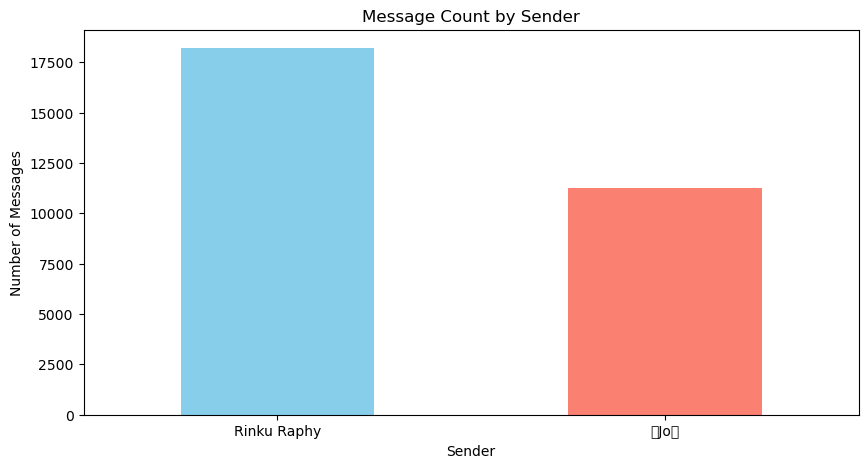

C:\Users\JOSE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128157 (\N{HEART WITH RIBBON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


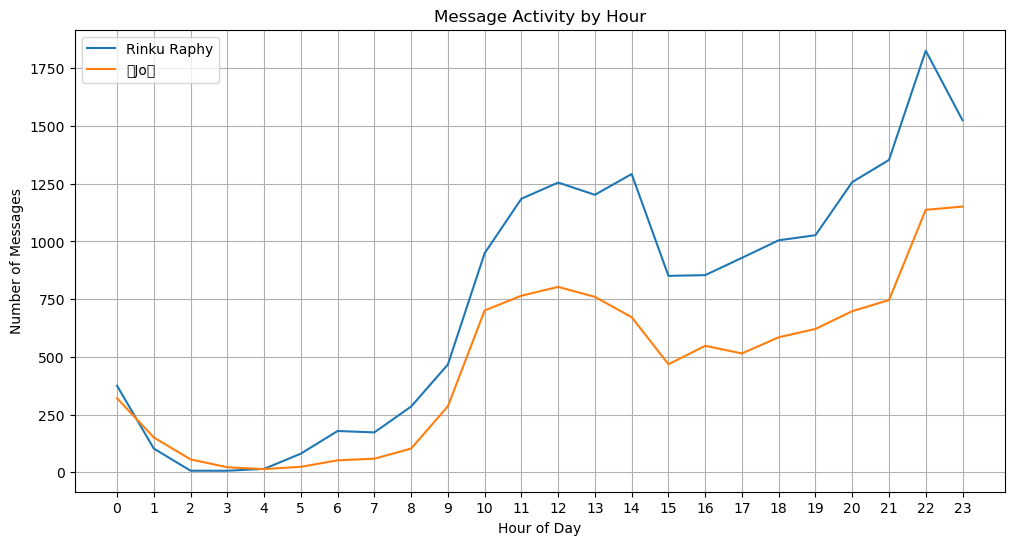

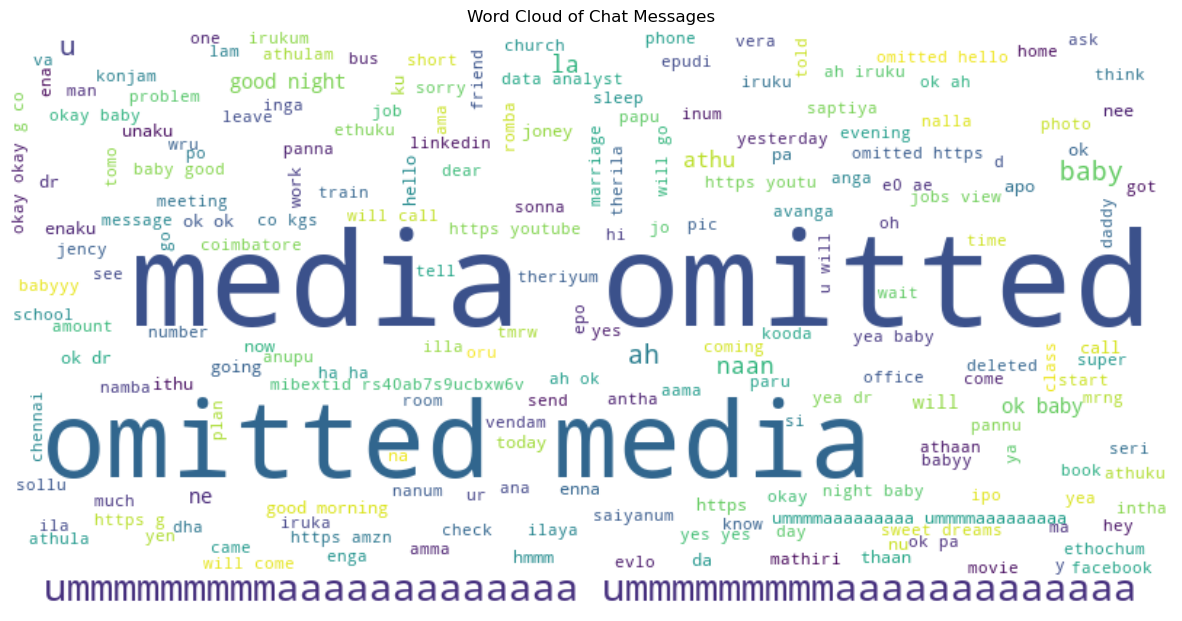


Media Shared Count:
Sender
Rinku Raphy    2953
💝Jo💝           1398
Name: count, dtype: int64

Top 10 Emojis Used:
😂: 869 times
😘: 450 times
😁: 218 times
👍: 216 times
😡: 201 times
😬: 128 times
👺: 85 times
🙈: 76 times
😐: 71 times
😭: 64 times


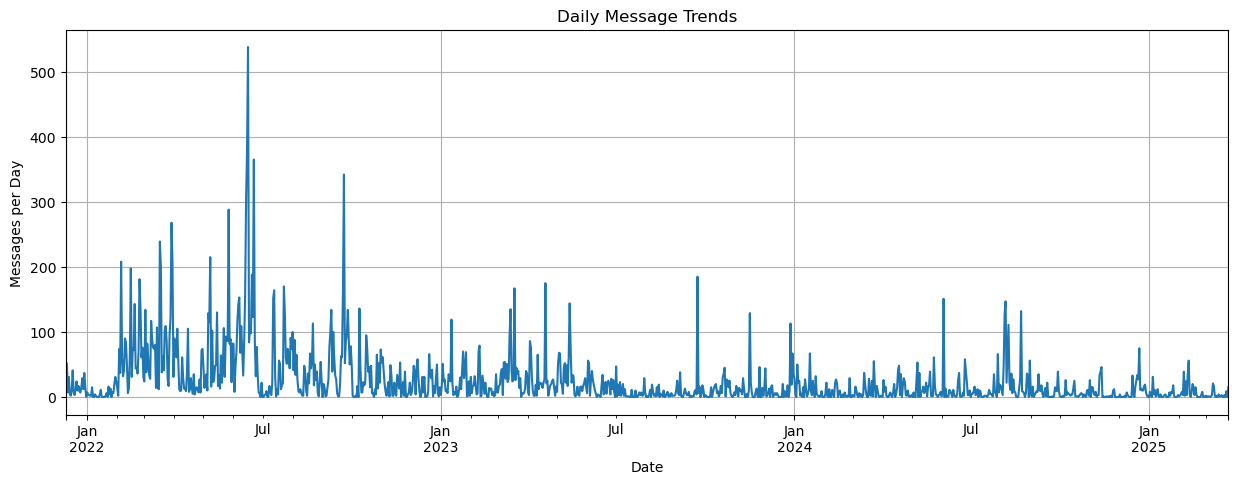


Average Response Time: 54.42 minutes


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter

# Load data
df = pd.read_csv('cleaned_chat.csv', parse_dates=['DateTime'])

# Basic Statistics
print("Basic Statistics:")
print(f"Total messages: {len(df)}")
print(f"Date range: {df['DateTime'].min()} to {df['DateTime'].max()}")
print("\nMessage Count by Sender:")
print(df['Sender'].value_counts())

# 1. Message Count Analysis
plt.figure(figsize=(10,5))
df['Sender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Message Count by Sender')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

# 2. Active Hours Analysis
df['Hour'] = df['DateTime'].dt.hour
plt.figure(figsize=(12,6))
for sender in df['Sender'].unique():
    sender_data = df[df['Sender'] == sender]
    sender_data['Hour'].value_counts().sort_index().plot(label=sender)
plt.title('Message Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.legend()
plt.xticks(range(24))
plt.grid(True)
plt.show()

# 3. Word Cloud
all_text = ' '.join(df['Message'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Chat Messages')
plt.show()

# 4. Media Analysis
media_counts = df[df['Message'] == '<media omitted>']['Sender'].value_counts()
print("\nMedia Shared Count:")
print(media_counts)

# 5. Emoji Analysis
def extract_emojis(text):
    return re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF]', str(text))

all_emojis = df['Message'].apply(extract_emojis).sum()
emoji_counts = Counter(all_emojis).most_common(10)

print("\nTop 10 Emojis Used:")
for emoji, count in emoji_counts:
    print(f"{emoji}: {count} times")

# 6. Daily Trend Analysis
daily = df.resample('D', on='DateTime').size()
plt.figure(figsize=(15,5))
daily.plot()
plt.title('Daily Message Trends')
plt.xlabel('Date')
plt.ylabel('Messages per Day')
plt.grid(True)
plt.show()

# 7. Response Time Analysis (Advanced)
response_times = []
prev_row = None

for _, row in df.sort_values('DateTime').iterrows():
    if prev_row is not None and row['Sender'] != prev_row['Sender']:  # Explicit check for None
        response_time = (row['DateTime'] - prev_row['DateTime']).total_seconds() / 60
        response_times.append(response_time)
    prev_row = row  # Ensure prev_row is a row, not a Series


print(f"\nAverage Response Time: {round(sum(response_times)/len(response_times), 2)} minutes")